## IMPORT CODE

In [1]:
import pandas as pd 
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

## READ DATA

In [2]:
df = pd.read_csv("1. Weather Data.csv")

In [3]:
df.head()

,Date/Time,Temp_C,Dew Point Temp_C,Rel Hum_%,Wind Speed_km/h,Visibility_km,Press_kPa,Weather
0,1/1/2012 0:00,-1.8,-3.9,86,4,8.0,101.24,Fog
1,1/1/2012 1:00,-1.8,-3.7,87,4,8.0,101.24,Fog
2,1/1/2012 2:00,-1.8,-3.4,89,7,4.0,101.26,"Freezing Drizzle,Fog"
3,1/1/2012 3:00,-1.5,-3.2,88,6,4.0,101.27,"Freezing Drizzle,Fog"
4,1/1/2012 4:00,-1.5,-3.3,88,7,4.8,101.23,Fog


In [4]:
df.columns

Index(['Date/Time', 'Temp_C', 'Dew Point Temp_C', 'Rel Hum_%',
       'Wind Speed_km/h', 'Visibility_km', 'Press_kPa', 'Weather'],
      dtype='object')

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8784 entries, 0 to 8783
Data columns (total 8 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Date/Time         8784 non-null   object 
 1   Temp_C            8784 non-null   float64
 2   Dew Point Temp_C  8784 non-null   float64
 3   Rel Hum_%         8784 non-null   int64  
 4   Wind Speed_km/h   8784 non-null   int64  
 5   Visibility_km     8784 non-null   float64
 6   Press_kPa         8784 non-null   float64
 7   Weather           8784 non-null   object 
dtypes: float64(4), int64(2), object(2)
memory usage: 549.1+ KB


## DATA PREPROCESSING

First, convert all the object data to relevant data types.

In [6]:
df["Date/Time"] = pd.to_datetime(df['Date/Time'])

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8784 entries, 0 to 8783
Data columns (total 8 columns):
 #   Column            Non-Null Count  Dtype         
---  ------            --------------  -----         
 0   Date/Time         8784 non-null   datetime64[ns]
 1   Temp_C            8784 non-null   float64       
 2   Dew Point Temp_C  8784 non-null   float64       
 3   Rel Hum_%         8784 non-null   int64         
 4   Wind Speed_km/h   8784 non-null   int64         
 5   Visibility_km     8784 non-null   float64       
 6   Press_kPa         8784 non-null   float64       
 7   Weather           8784 non-null   object        
dtypes: datetime64[ns](1), float64(4), int64(2), object(1)
memory usage: 549.1+ KB


Find duplicate and null values and remove them.

In [8]:
df.duplicated().sum()

0

Since there are no duplicate values, now I'll check null values.

In [9]:
df.isnull().sum()

Date/Time           0
Temp_C              0
Dew Point Temp_C    0
Rel Hum_%           0
Wind Speed_km/h     0
Visibility_km       0
Press_kPa           0
Weather             0
dtype: int64

From above info, it is clear that none of the columns have null values. Thus, no further preprocessing steps are required. 

The existence of non-null values can further be validated by a heat map. 

<AxesSubplot: >

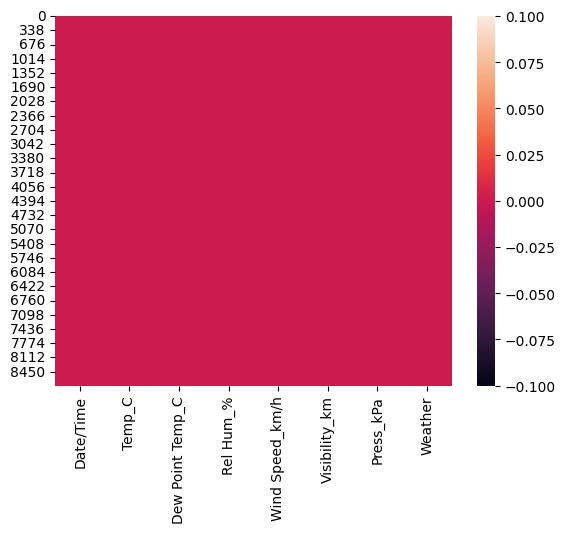

In [10]:
sns.heatmap(df.isnull())

# EXPLORATORY DATA ANALYSIS

In [11]:
Weather = df['Weather'].value_counts().reset_index()
Weather.columns = ['Weather', 'Count']
Weather

,Weather,Count
0,Mainly Clear,2106
1,Mostly Cloudy,2069
2,Cloudy,1728
3,Clear,1326
4,Snow,390
5,Rain,306
6,Rain Showers,188
7,Fog,150
8,"Rain,Fog",116
9,"Drizzle,Fog",80


## Most frequent weather conditions

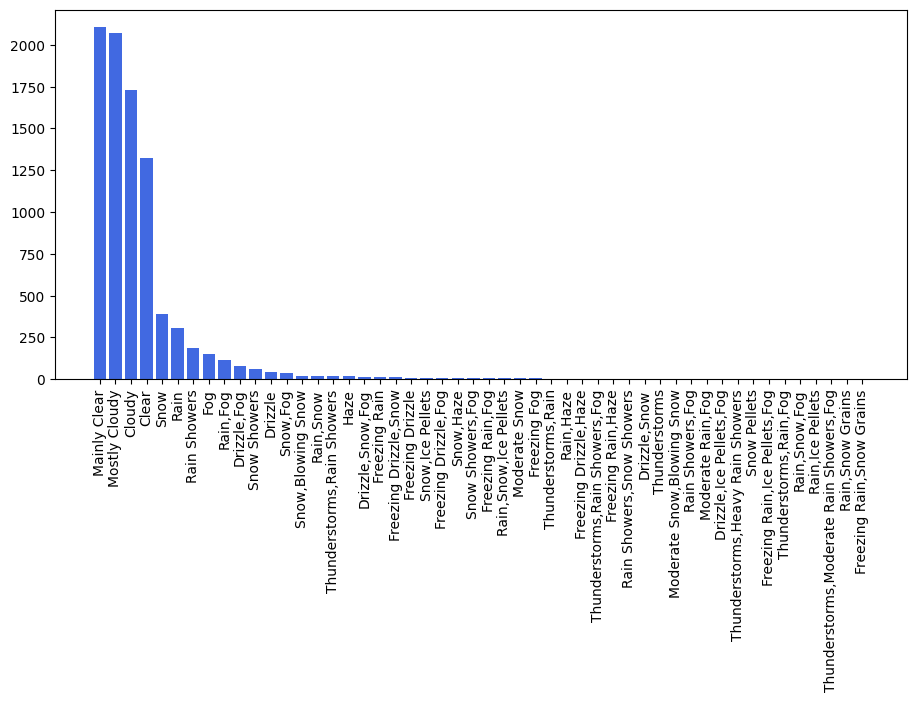

In [12]:
x = Weather['Weather']
y = Weather['Count']

fig, ax = plt.subplots()
fig.set_figwidth(11)
bar_container = ax.bar(x,y,color='royalblue', )
plt.xticks(rotation=90)
plt.show()

## WEATHER V/S TEMPERATURE

<AxesSubplot: title={'center': 'WEATHER VS TEMPERATURE'}, xlabel='Weather', ylabel='Temp_C'>

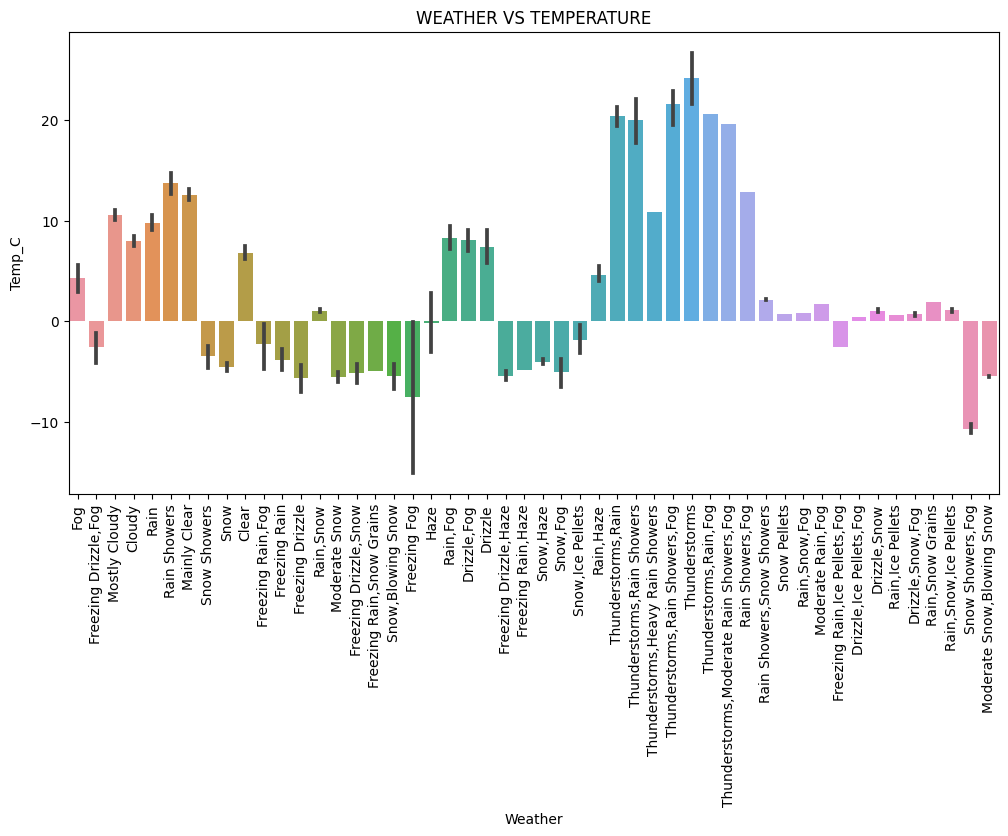

In [13]:
plt.figure(figsize=(12,6))
plt.xticks(rotation=90)
plt.title('WEATHER VS TEMPERATURE')
sns.barplot(x=df['Weather'], y=df['Temp_C'])

<AxesSubplot: title={'center': 'WEATHER VS WIND SPEED'}, xlabel='Weather', ylabel='Wind Speed_km/h'>

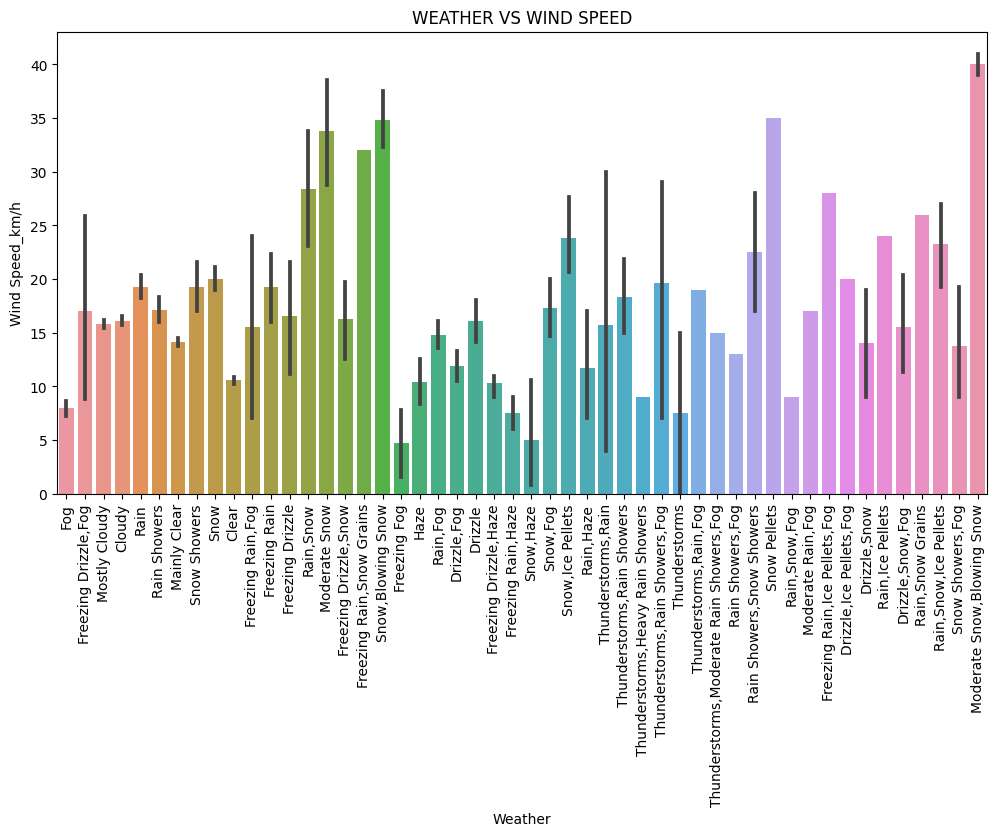

In [14]:
plt.figure(figsize=(12,6))
plt.xticks(rotation=90)
plt.title('WEATHER VS WIND SPEED')
sns.barplot(x=df['Weather'], y=df['Wind Speed_km/h'])

In [15]:
plt.figure(figsize=(12,6))
plt.xticks(rotation=90)
plt.title('WEATHER VS PRESSURE')
sns.lineplot(x=df['Weather'], y=df['Press_kPa'])
plt.ylabel('Pressure in kPa')

Text(0, 0.5, 'Pressure in kPa')

/tmp/ipykernel_267/3211590840.py:3: UserWarning: You have mixed positional and keyword arguments, some input may be discarded.
  plt.legend(patches, labels = Weather['Weather'], loc="upper left", bbox_to_anchor=(1.5,1.025))


(-1.0999993293929151,
 1.0999999650079948,
 -1.0999969416302486,
 1.0999998543633451)

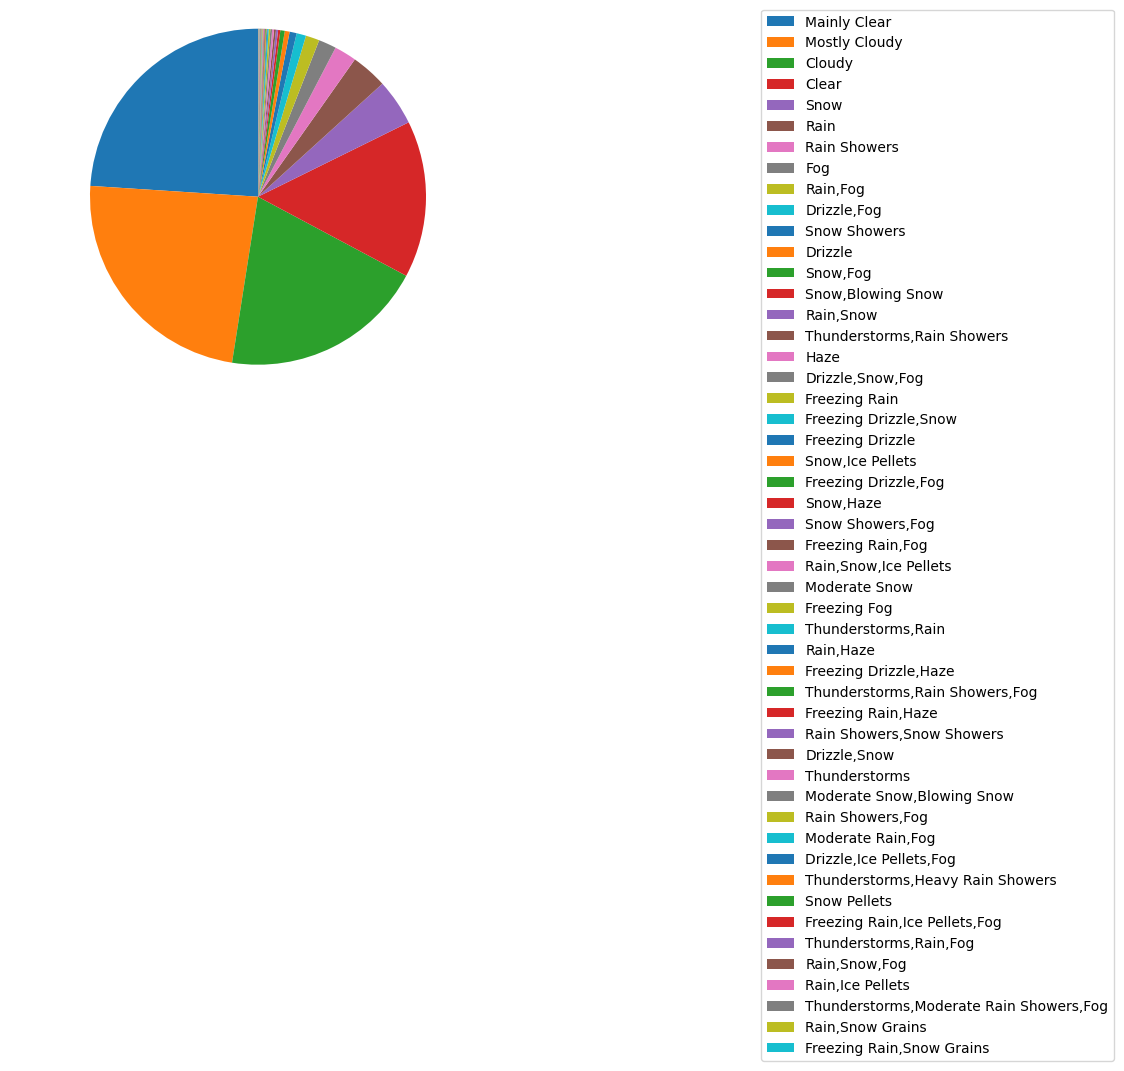

In [16]:
# plt.pie(Weather['Count'], labels=Weather['Weather'])
patches, texts = plt.pie(Weather['Count'], startangle=90)
plt.legend(patches, labels = Weather['Weather'], loc="upper left", bbox_to_anchor=(1.5,1.025))
plt.axis('equal')

# BASIC ANALYSIS

Q.1. Find all the unique "Wind Speed" values in the data.

In [17]:
    df.head()

,Date/Time,Temp_C,Dew Point Temp_C,Rel Hum_%,Wind Speed_km/h,Visibility_km,Press_kPa,Weather
0,2012-01-01 00:00:00,-1.8,-3.9,86,4,8.0,101.24,Fog
1,2012-01-01 01:00:00,-1.8,-3.7,87,4,8.0,101.24,Fog
2,2012-01-01 02:00:00,-1.8,-3.4,89,7,4.0,101.26,"Freezing Drizzle,Fog"
3,2012-01-01 03:00:00,-1.5,-3.2,88,6,4.0,101.27,"Freezing Drizzle,Fog"
4,2012-01-01 04:00:00,-1.5,-3.3,88,7,4.8,101.23,Fog


In [18]:
df['Wind Speed_km/h'].unique()

array([ 4,  7,  6,  9, 15, 13, 20, 22, 19, 24, 30, 35, 39, 32, 33, 26, 44,
       43, 48, 37, 28, 17, 11,  0, 83, 70, 57, 46, 41, 52, 50, 63, 54,  2])

Q.2. Find the number of times when the "Weather is exactly Clear".

In [19]:
(df['Weather'] == 'Clear').sum()

1326

Q.3. Find the number of times when the 'Wind Speed was exactly 4 km/h'.

In [20]:
(df['Wind Speed_km/h'] == 4).sum()

474

Q.4. Find out all the null values in the data. 

In [21]:
df.isnull().sum()

Date/Time           0
Temp_C              0
Dew Point Temp_C    0
Rel Hum_%           0
Wind Speed_km/h     0
Visibility_km       0
Press_kPa           0
Weather             0
dtype: int64

Q.5. Rename the column name 'Weather' of the dataframe to 'Weather Condition'.

In [22]:
df.rename(columns={'Weather':'Weather Condition'}, inplace=True)

In [23]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8784 entries, 0 to 8783
Data columns (total 8 columns):
 #   Column             Non-Null Count  Dtype         
---  ------             --------------  -----         
 0   Date/Time          8784 non-null   datetime64[ns]
 1   Temp_C             8784 non-null   float64       
 2   Dew Point Temp_C   8784 non-null   float64       
 3   Rel Hum_%          8784 non-null   int64         
 4   Wind Speed_km/h    8784 non-null   int64         
 5   Visibility_km      8784 non-null   float64       
 6   Press_kPa          8784 non-null   float64       
 7   Weather Condition  8784 non-null   object        
dtypes: datetime64[ns](1), float64(4), int64(2), object(1)
memory usage: 549.1+ KB


Q.6. What is the mean 'Visibility'?

In [24]:
df['Visibility_km'].mean()

27.664446721311478

Q.7. What is the standard deviation of 'Pressure' in this data?

In [25]:
df['Press_kPa'].std()

0.8440047459486483

Q.8. What is the variance of 'Relative Humidity' in this data?

In [26]:
df['Rel Hum_%'].var()

286.24855019850196

Q.9. Find all instances when 'Snow' was recorded.

In [27]:
df[df['Weather Condition'].str.contains('Snow')]

,Date/Time,Temp_C,Dew Point Temp_C,Rel Hum_%,Wind Speed_km/h,Visibility_km,Press_kPa,Weather Condition
41,2012-01-02 17:00:00,-2.1,-9.5,57,22,25.0,99.66,Snow Showers
44,2012-01-02 20:00:00,-5.6,-13.4,54,24,25.0,100.07,Snow Showers
45,2012-01-02 21:00:00,-5.8,-12.8,58,26,25.0,100.15,Snow Showers
47,2012-01-02 23:00:00,-7.4,-14.1,59,17,19.3,100.27,Snow Showers
48,2012-01-03 00:00:00,-9.0,-16.0,57,28,25.0,100.35,Snow Showers
...,...,...,...,...,...,...,...,...
8779,2012-12-31 19:00:00,0.1,-2.7,81,30,9.7,100.13,Snow
8780,2012-12-31 20:00:00,0.2,-2.4,83,24,9.7,100.03,Snow
8781,2012-12-31 21:00:00,-0.5,-1.5,93,28,4.8,99.95,Snow
8782,2012-12-31 22:00:00,-0.2,-1.8,89,28,9.7,99.91,Snow


Q.10. Find all instances when 'Wind Speed is above 24' and 'Visibility is 25'.

In [28]:
df[(df['Wind Speed_km/h']>24) & (df['Visibility_km']==25) ]

,Date/Time,Temp_C,Dew Point Temp_C,Rel Hum_%,Wind Speed_km/h,Visibility_km,Press_kPa,Weather Condition
23,2012-01-01 23:00:00,5.3,2.0,79,30,25.0,99.31,Cloudy
24,2012-01-02 00:00:00,5.2,1.5,77,35,25.0,99.26,Rain Showers
25,2012-01-02 01:00:00,4.6,0.0,72,39,25.0,99.26,Cloudy
26,2012-01-02 02:00:00,3.9,-0.9,71,32,25.0,99.26,Mostly Cloudy
27,2012-01-02 03:00:00,3.7,-1.5,69,33,25.0,99.30,Mostly Cloudy
...,...,...,...,...,...,...,...,...
8705,2012-12-28 17:00:00,-8.6,-12.0,76,26,25.0,101.34,Mainly Clear
8753,2012-12-30 17:00:00,-12.1,-15.8,74,28,25.0,101.26,Mainly Clear
8755,2012-12-30 19:00:00,-13.4,-16.5,77,26,25.0,101.47,Mainly Clear
8759,2012-12-30 23:00:00,-12.1,-15.1,78,28,25.0,101.52,Mostly Cloudy


Q.11. What is the mean value of each column against each 'Weather Condition'?

In [29]:
df.groupby('Weather Condition').mean()

,Temp_C,Dew Point Temp_C,Rel Hum_%,Wind Speed_km/h,Visibility_km,Press_kPa
Weather Condition,,,,,,
Clear,6.825716,0.089367,64.497738,10.557315,30.153243,101.587443
Cloudy,7.970544,2.375810,69.592593,16.127315,26.625752,100.911441
Drizzle,7.353659,5.504878,88.243902,16.097561,17.931707,100.435366
"Drizzle,Fog",8.067500,7.033750,93.275000,11.862500,5.257500,100.786625
"Drizzle,Ice Pellets,Fog",0.400000,-0.700000,92.000000,20.000000,4.000000,100.790000
"Drizzle,Snow",1.050000,0.150000,93.500000,14.000000,10.500000,100.890000
"Drizzle,Snow,Fog",0.693333,0.120000,95.866667,15.533333,5.513333,99.281333
Fog,4.303333,3.159333,92.286667,7.946667,6.248000,101.184067
Freezing Drizzle,-5.657143,-8.000000,83.571429,16.571429,9.200000,100.202857


Q.12. What is the minimum and maximum value of each column against 'Weather Condition'?

In [30]:
df.groupby('Weather Condition').max()

,Date/Time,Temp_C,Dew Point Temp_C,Rel Hum_%,Wind Speed_km/h,Visibility_km,Press_kPa
Weather Condition,,,,,,,
Clear,2012-12-30 20:00:00,32.8,20.4,99,33,48.3,103.63
Cloudy,2012-12-31 06:00:00,30.5,22.6,99,54,48.3,103.65
Drizzle,2012-12-22 01:00:00,18.8,17.7,96,30,25.0,101.56
"Drizzle,Fog",2012-12-19 10:00:00,19.9,19.1,100,28,9.7,102.07
"Drizzle,Ice Pellets,Fog",2012-12-17 09:00:00,0.4,-0.7,92,20,4.0,100.79
"Drizzle,Snow",2012-12-19 18:00:00,1.2,0.2,95,19,11.3,101.15
"Drizzle,Snow,Fog",2012-12-22 03:00:00,1.1,0.6,98,32,9.7,100.15
Fog,2012-12-29 10:00:00,20.8,19.6,100,22,9.7,103.04
Freezing Drizzle,2012-12-17 00:00:00,-2.3,-3.3,93,26,12.9,101.02


In [31]:
df.groupby('Weather Condition').min()

,Date/Time,Temp_C,Dew Point Temp_C,Rel Hum_%,Wind Speed_km/h,Visibility_km,Press_kPa
Weather Condition,,,,,,,
Clear,2012-01-03 19:00:00,-23.3,-28.5,20,0,11.3,99.52
Cloudy,2012-01-01 17:00:00,-21.4,-26.8,18,0,11.3,98.39
Drizzle,2012-01-23 21:00:00,1.1,-0.2,74,0,6.4,97.84
"Drizzle,Fog",2012-01-23 20:00:00,0.0,-1.6,85,0,1.0,98.65
"Drizzle,Ice Pellets,Fog",2012-12-17 09:00:00,0.4,-0.7,92,20,4.0,100.79
"Drizzle,Snow",2012-12-17 15:00:00,0.9,0.1,92,9,9.7,100.63
"Drizzle,Snow,Fog",2012-12-18 21:00:00,0.3,-0.1,92,7,2.4,97.79
Fog,2012-01-01 00:00:00,-16.0,-17.2,80,0,0.2,98.31
Freezing Drizzle,2012-01-07 11:00:00,-9.0,-12.2,78,6,4.8,98.44


Q.13. Show all the records where the weather condition is Fog. 

In [32]:
df[df['Weather Condition'].str.contains('Fog')]

,Date/Time,Temp_C,Dew Point Temp_C,Rel Hum_%,Wind Speed_km/h,Visibility_km,Press_kPa,Weather Condition
0,2012-01-01 00:00:00,-1.8,-3.9,86,4,8.0,101.24,Fog
1,2012-01-01 01:00:00,-1.8,-3.7,87,4,8.0,101.24,Fog
2,2012-01-01 02:00:00,-1.8,-3.4,89,7,4.0,101.26,"Freezing Drizzle,Fog"
3,2012-01-01 03:00:00,-1.5,-3.2,88,6,4.0,101.27,"Freezing Drizzle,Fog"
4,2012-01-01 04:00:00,-1.5,-3.3,88,7,4.8,101.23,Fog
...,...,...,...,...,...,...,...,...
8739,2012-12-30 03:00:00,-9.1,-10.4,90,11,3.6,100.30,"Snow,Fog"
8740,2012-12-30 04:00:00,-9.3,-10.6,90,13,9.7,100.28,"Snow,Fog"
8741,2012-12-30 05:00:00,-9.1,-10.4,90,11,4.0,100.32,"Snow,Fog"
8742,2012-12-30 06:00:00,-9.3,-10.8,89,17,8.0,100.39,"Snow,Fog"


Q.14. Find all the instances when 'Weather is Clear' or 'Visibility is above 40'.

In [33]:
df[(df['Weather Condition']=='Clear') | (df['Visibility_km']>40)]

,Date/Time,Temp_C,Dew Point Temp_C,Rel Hum_%,Wind Speed_km/h,Visibility_km,Press_kPa,Weather Condition
67,2012-01-03 19:00:00,-16.9,-24.8,50,24,25.0,101.74,Clear
106,2012-01-05 10:00:00,-6.0,-10.0,73,17,48.3,100.45,Mainly Clear
107,2012-01-05 11:00:00,-5.6,-10.2,70,22,48.3,100.41,Mainly Clear
108,2012-01-05 12:00:00,-4.7,-9.6,69,20,48.3,100.38,Mainly Clear
109,2012-01-05 13:00:00,-4.4,-9.7,66,26,48.3,100.40,Mainly Clear
...,...,...,...,...,...,...,...,...
8749,2012-12-30 13:00:00,-12.4,-16.2,73,37,48.3,100.92,Mostly Cloudy
8750,2012-12-30 14:00:00,-11.8,-16.1,70,37,48.3,100.96,Mainly Clear
8751,2012-12-30 15:00:00,-11.3,-15.6,70,32,48.3,101.05,Mainly Clear
8752,2012-12-30 16:00:00,-11.4,-15.5,72,26,48.3,101.15,Mainly Clear


Q.15. Find all instances when:

A. ' Weather is Clear' and 'Relative Humidity is greater than 50'

or

B. 'Visibility is above 40.

In [34]:
df[(df['Weather Condition']=='Clear') & (df['Rel Hum_%']>50) | (df['Visibility_km']>40)]

,Date/Time,Temp_C,Dew Point Temp_C,Rel Hum_%,Wind Speed_km/h,Visibility_km,Press_kPa,Weather Condition
106,2012-01-05 10:00:00,-6.0,-10.0,73,17,48.3,100.45,Mainly Clear
107,2012-01-05 11:00:00,-5.6,-10.2,70,22,48.3,100.41,Mainly Clear
108,2012-01-05 12:00:00,-4.7,-9.6,69,20,48.3,100.38,Mainly Clear
109,2012-01-05 13:00:00,-4.4,-9.7,66,26,48.3,100.40,Mainly Clear
110,2012-01-05 14:00:00,-5.1,-10.7,65,22,48.3,100.46,Mainly Clear
...,...,...,...,...,...,...,...,...
8749,2012-12-30 13:00:00,-12.4,-16.2,73,37,48.3,100.92,Mostly Cloudy
8750,2012-12-30 14:00:00,-11.8,-16.1,70,37,48.3,100.96,Mainly Clear
8751,2012-12-30 15:00:00,-11.3,-15.6,70,32,48.3,101.05,Mainly Clear
8752,2012-12-30 16:00:00,-11.4,-15.5,72,26,48.3,101.15,Mainly Clear


<a style='text-decoration:none;line-height:16px;display:flex;color:#5B5B62;padding:10px;justify-content:end;' href='https://deepnote.com?utm_source=created-in-deepnote-cell&projectId=dbf5ff78-a4c8-4a71-8c24-081db4ac07b2' target="_blank">
 </img>
Created in <span style='font-weight:600;margin-left:4px;'>Deepnote</span></a>